https://machinelearningmastery.com/standard-machine-learning-datasets/

7번 Abalone

Abalone Dataset은 개인의 객관적인 척도가 주어진 전복의 나이를 예측하는 것

#### 초기모델
- 2층 신경망
- 학습률 0.1
- 학습 횟수 300회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 1]))
        self.b2 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        return y2

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=300)

Epoch 1/300
105/105 [==============================] - 1s 1ms/step - loss: 0.2037
Epoch 2/300
105/105 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 3/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0989
Epoch 4/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 5/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 6/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 7/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 8/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 9/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 10/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 11/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 12/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 13/300


<Axes: >

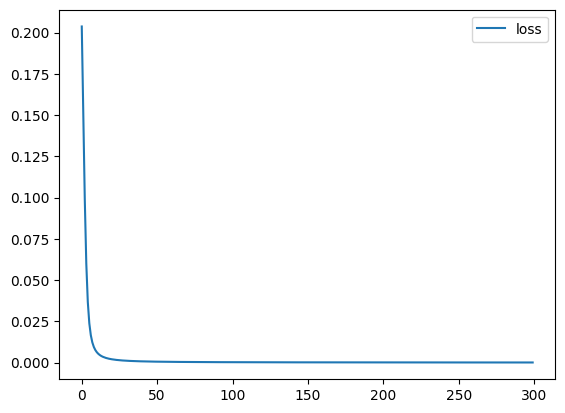

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####2차모델
- 2층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 1]))
        self.b2 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        return y2

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
105/105 [==============================] - 2s 4ms/step - loss: 0.3783
Epoch 2/500
105/105 [==============================] - 0s 4ms/step - loss: 0.3519
Epoch 3/500
105/105 [==============================] - 0s 4ms/step - loss: 0.3271
Epoch 4/500
105/105 [==============================] - 0s 4ms/step - loss: 0.3050
Epoch 5/500
105/105 [==============================] - 0s 5ms/step - loss: 0.2863
Epoch 6/500
105/105 [==============================] - 0s 4ms/step - loss: 0.2708
Epoch 7/500
105/105 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 8/500
105/105 [==============================] - 0s 3ms/step - loss: 0.2488
Epoch 9/500
105/105 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 10/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2354
Epoch 11/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 12/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 13/500


<Axes: >

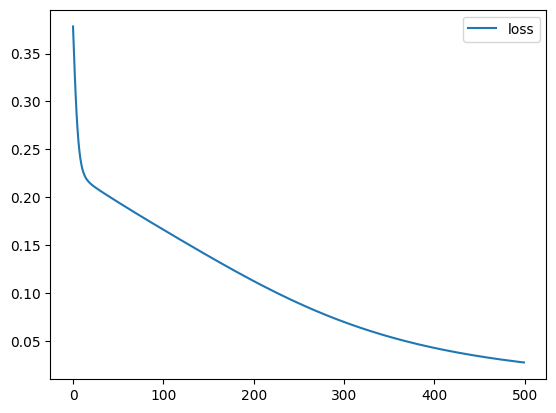

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####3차모델
- 3층 신경망
- 학습률 0.1
- 학습 횟수 300회

In [ ]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 20]))
        self.b2 = tf.Variable(initializer([20]))
        self.w3 = tf.Variable(initializer([20, 1]))
        self.b3 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        return y3

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=300)

Epoch 1/300
105/105 [==============================] - 3s 7ms/step - loss: 0.2338
Epoch 2/300
105/105 [==============================] - 1s 6ms/step - loss: 0.2255
Epoch 3/300
105/105 [==============================] - 1s 14ms/step - loss: 0.2163
Epoch 4/300
105/105 [==============================] - 0s 4ms/step - loss: 0.2048
Epoch 5/300
105/105 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 6/300
105/105 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 7/300
105/105 [==============================] - 0s 1ms/step - loss: 0.1360
Epoch 8/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 9/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 10/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 11/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 12/300
105/105 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 13/300

<Axes: >

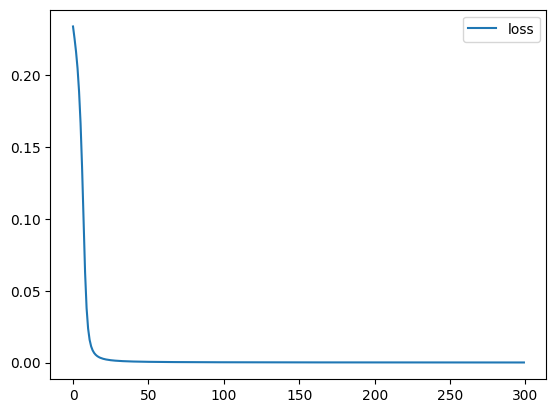

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####4차모델
- 3층 신경망
- 학습률 0.01
- 학습 횟수 500회

In [ ]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 20]))
        self.b2 = tf.Variable(initializer([20]))
        self.w3 = tf.Variable(initializer([20, 1]))
        self.b3 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        return y3

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.01
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
105/105 [==============================] - 1s 2ms/step - loss: 0.2362
Epoch 2/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 3/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2338
Epoch 4/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 5/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2315
Epoch 6/500
105/105 [==============================] - 0s 1ms/step - loss: 0.2304
Epoch 7/500
105/105 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 8/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2282
Epoch 9/500
105/105 [==============================] - 0s 1ms/step - loss: 0.2271
Epoch 10/500
105/105 [==============================] - 0s 1ms/step - loss: 0.2261
Epoch 11/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 12/500
105/105 [==============================] - 0s 2ms/step - loss: 0.2239
Epoch 13/500


<Axes: >

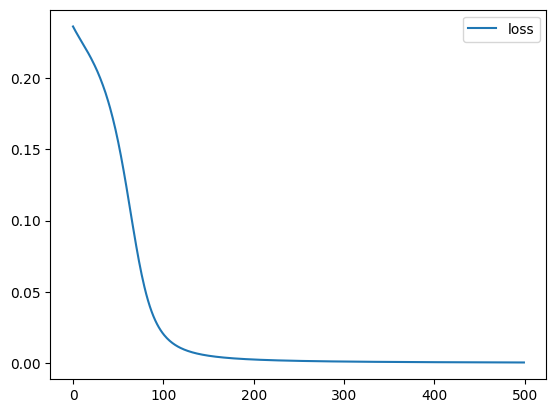

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####5차모델
- 7층 신경망
- 학습률 0.1
- 학습 횟수 300회

In [ ]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 40]))
        self.b2 = tf.Variable(initializer([40]))
        self.w3 = tf.Variable(initializer([40, 30]))
        self.b3 = tf.Variable(initializer([30]))
        self.w4 = tf.Variable(initializer([30, 20]))
        self.b4 = tf.Variable(initializer([20]))
        self.w5 = tf.Variable(initializer([20, 15]))
        self.b5 = tf.Variable(initializer([15]))
        self.w6 = tf.Variable(initializer([15, 10]))
        self.b6 = tf.Variable(initializer([10]))
        self.w7 = tf.Variable(initializer([10, 1]))
        self.b7 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        y5 = tf.keras.activations.sigmoid(tf.matmul(y4, self.w5) + self.b5)
        y6 = tf.keras.activations.sigmoid(tf.matmul(y5, self.w6) + self.b6)
        y7 = tf.keras.activations.sigmoid(tf.matmul(y6, self.w7) + self.b7)
        return y7

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=300)

Epoch 1/300
105/105 [==============================] - 3s 2ms/step - loss: 0.2360
Epoch 2/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 3/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 4/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2320
Epoch 5/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 6/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 7/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2320
Epoch 8/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 9/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 10/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 11/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 12/300
105/105 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 13/300


<Axes: >

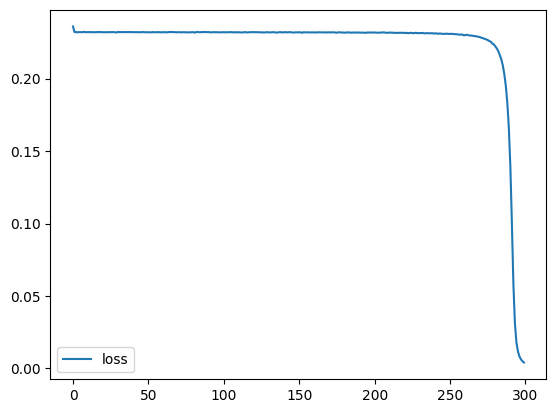

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####6차모델
- 7층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
# 데이터셋 로드
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_data = pd.read_csv(url, header=None)

abalone_data.info()

abalone_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
abalone_data.iloc[:, -1] = encoder.fit_transform(abalone_data.iloc[:, -1])

# 성별 열을 원-핫 인코딩
abalone_data = pd.get_dummies(abalone_data, columns=[0])

# 입력 데이터와 레이블 분리
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X.columns = X.columns.astype(str)  # 입력 변수의 이름을 문자열로 변환
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([10, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 40]))
        self.b2 = tf.Variable(initializer([40]))
        self.w3 = tf.Variable(initializer([40, 30]))
        self.b3 = tf.Variable(initializer([30]))
        self.w4 = tf.Variable(initializer([30, 20]))
        self.b4 = tf.Variable(initializer([20]))
        self.w5 = tf.Variable(initializer([20, 15]))
        self.b5 = tf.Variable(initializer([15]))
        self.w6 = tf.Variable(initializer([15, 10]))
        self.b6 = tf.Variable(initializer([10]))
        self.w7 = tf.Variable(initializer([10, 1]))
        self.b7 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        y5 = tf.keras.activations.sigmoid(tf.matmul(y4, self.w5) + self.b5)
        y6 = tf.keras.activations.sigmoid(tf.matmul(y5, self.w6) + self.b6)
        y7 = tf.keras.activations.sigmoid(tf.matmul(y6, self.w7) + self.b7)
        return y7

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
105/105 [==============================] - 1s 2ms/step - loss: 0.4835
Epoch 2/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4781
Epoch 3/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4723
Epoch 4/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 5/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4601
Epoch 6/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4537
Epoch 7/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 8/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 9/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4328
Epoch 10/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4253
Epoch 11/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4177
Epoch 12/500
105/105 [==============================] - 0s 2ms/step - loss: 0.4099
Epoch 13/500


<Axes: >

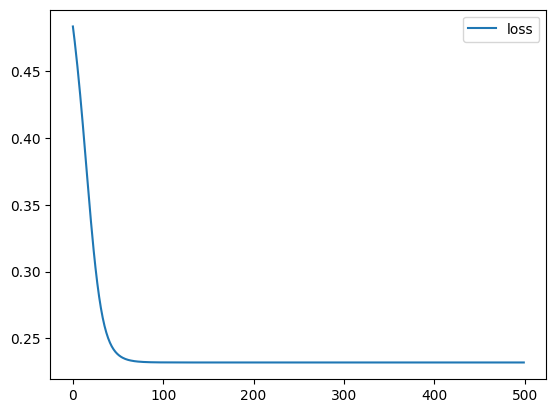

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()